# Interesting Combinations Review

The goal of this notebook is to make it easier to review some of the interesting combinations
produced by the script make_interesting_combinations.py

In [26]:
import env
from data.voxels import read_voxel_array, plot_voxels
from data.stl import plot_mesh, read_mesh_vectors
from random import randint
import numpy as np
import os


# plot things
%matplotlib inline
# autoreload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
root_dir = '../../3d-form-output/combinations'
good_combos = list()
bad_combos = list()

In [28]:
def select_random_combo():
    dirs = os.listdir(root_dir)
    start = randint(0, len(dirs)-1)
    start_dirs = [x for x in os.listdir(os.path.join(root_dir, dirs[start])) if '__' not in x]
    end = randint(0, len(start_dirs)-1)
    first = os.path.basename(dirs[start])
    second = os.path.basename(os.path.splitext(start_dirs[end])[0])
    if first == second:
        print('Oops! Try again!')
        assert False
    return first, second


def _plot_stl(stlfile):
    stl_data = read_mesh_vectors(stlfile)
    plot_mesh(stl_data, title=os.path.basename(stlfile))
    return


def _plot_binvox(voxfile):
    vox_data = np.load(voxfile)
    plot_voxels(vox_data, title=os.path.basename(voxfile))
    return


def _plot_combo(obj1, obj2):
    path = os.path.join(root_dir, obj1)
    obj2stl = os.path.join(path, obj2 + '.stl')
    if os.path.exists(path) and os.path.exists(obj2stl):
        _plot_stl(os.path.join(path, obj1 + '.stl'))
        _plot_stl(obj2stl)
        combo_root = os.path.join(path, '{}__{}'.format(obj1, obj2))
        _plot_stl(combo_root + '.baseline.stl')
        _plot_stl(combo_root + '.stl')
        _plot_binvox(combo_root + '.binvox.npy')
    return


def plot_combo(obj1, obj2):
    # try both combos; only one should exist
    _plot_combo(obj1, obj2)
    _plot_combo(obj2, obj1)
    return (obj1, obj2)


Vette_high_poly
toilet_0363_32_x0_z0


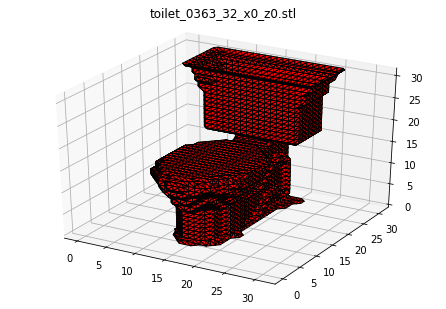

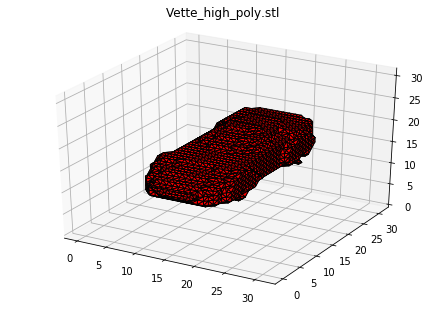

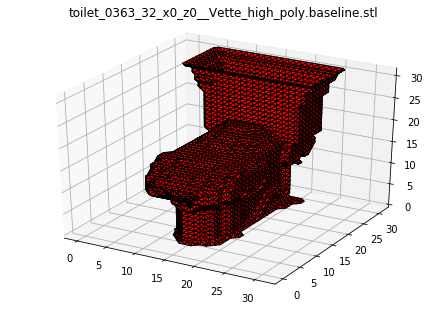

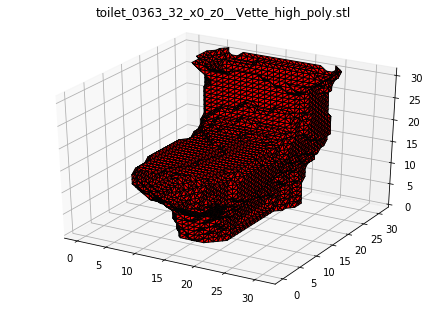

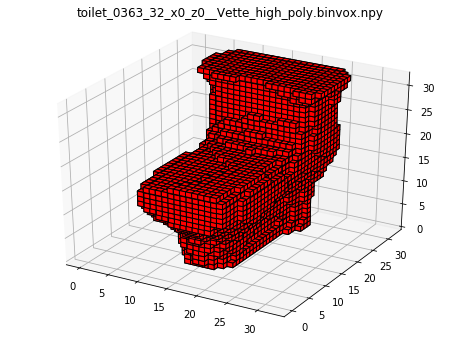

In [195]:
#obj1 = 'toilet_0363_32_x0_z0'
#obj2 = 'toilet_0358_32_x0_z0'
keep_going = True
while keep_going:
    obj1, obj2 = select_random_combo()
    
    obj1 = 'Vette_high_poly'
    obj2 = 'toilet_0363_32_x0_z0'
    
    combo1 = (obj1, obj2)
    combo2 = (obj2, obj1)
    if ((combo1 not in bad_combos and combo1 not in good_combos) or
        (combo2 not in bad_combos and combo2 not in good_combos)):
        keep_going = False
    else:
        print('repeat: {}'.format(combo1))

print(obj1)
print(obj2)

combo = plot_combo(obj1, obj2)

# Interesting Objects

In [151]:
# by category
from data.modelnet10 import KNOWN_INTERESTING_MODELNET10


def interesting_objects_by_category(category):
    for model in KNOWN_INTERESTING_MODELNET10:
        if category not in model:
            continue
        modelname = os.path.basename(os.path.splitext(model)[0])
        voxfile = os.path.join(root_dir, modelname, modelname + '.stl')
        _plot_stl(voxfile)

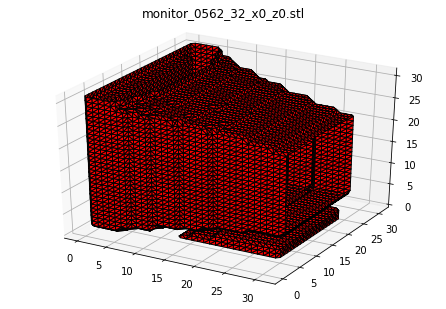

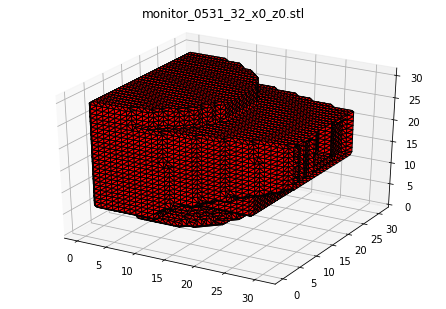

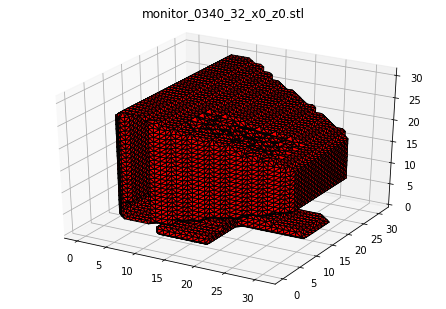

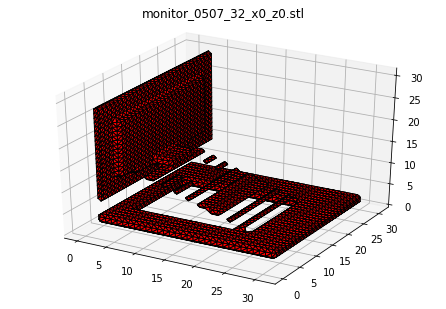

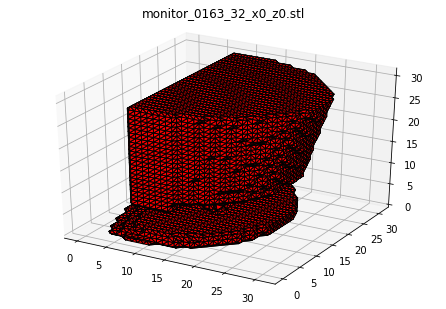

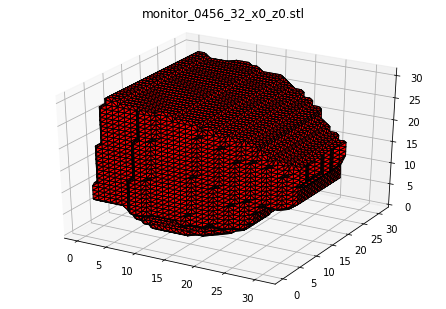

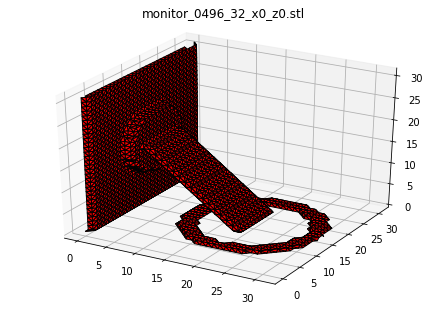

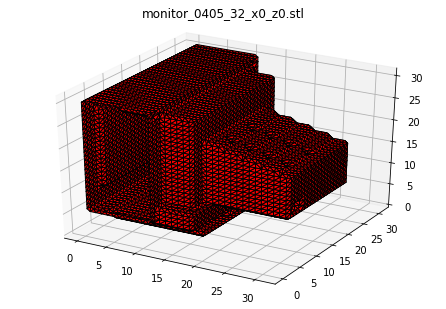

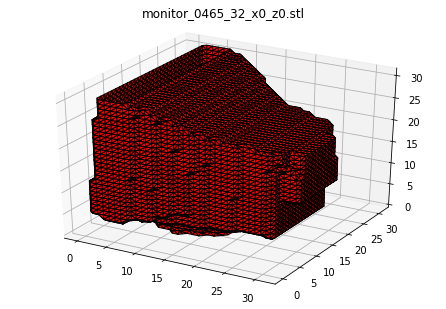

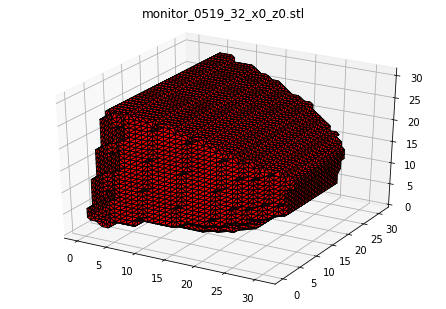

In [198]:
interesting_objects_by_category('monitor')

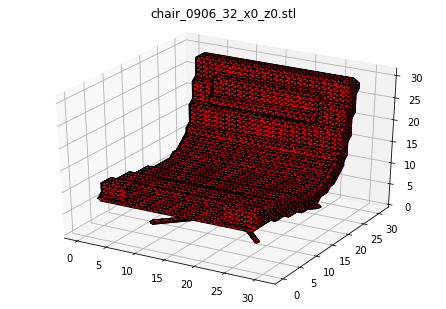

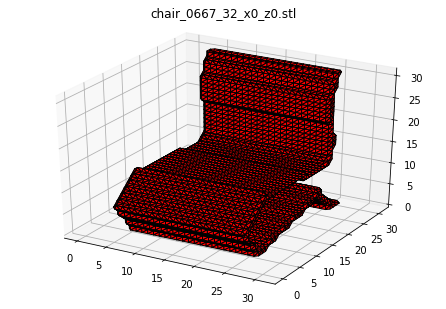

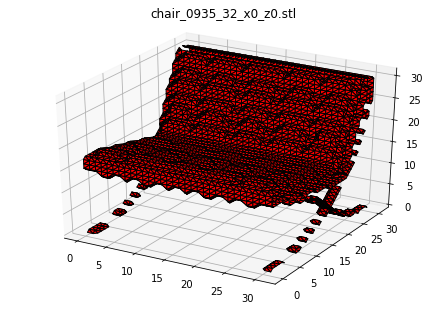

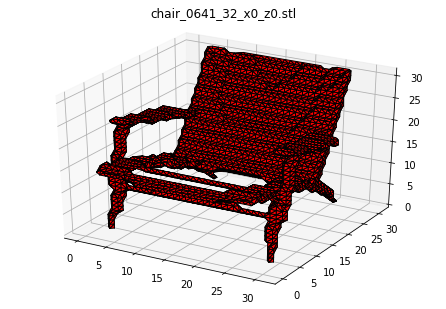

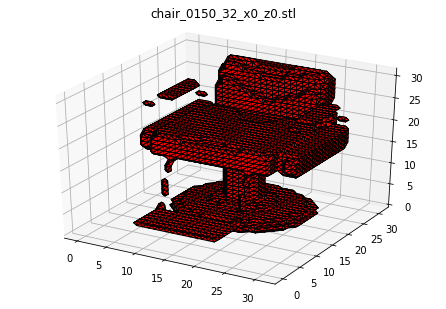

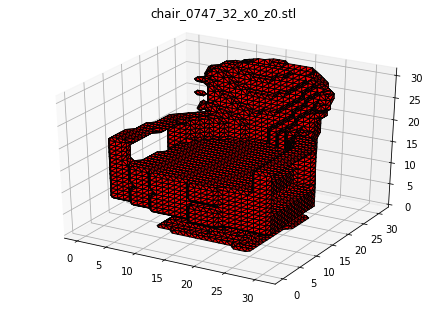

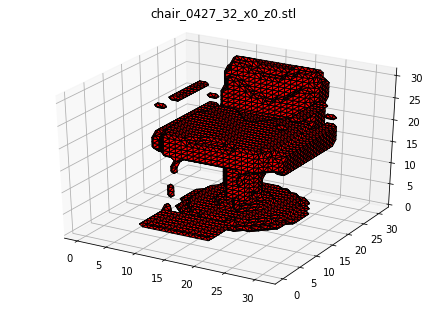

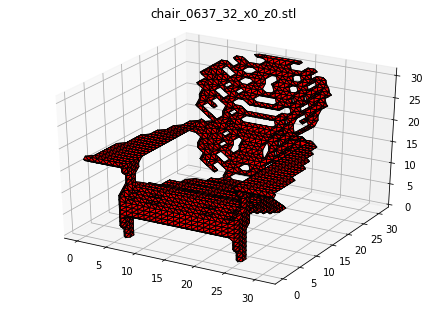

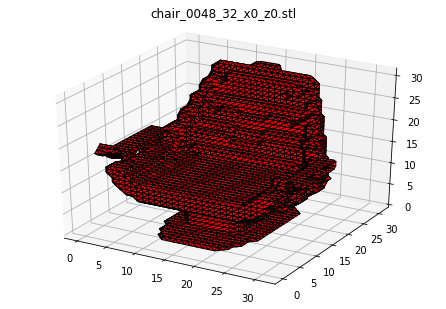

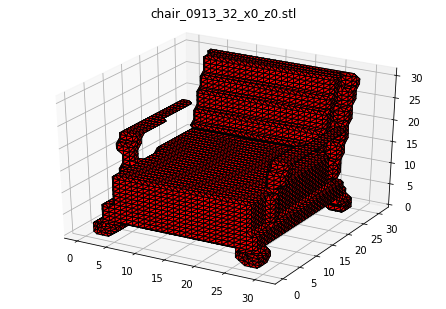

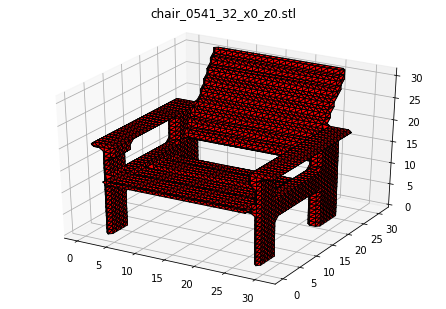

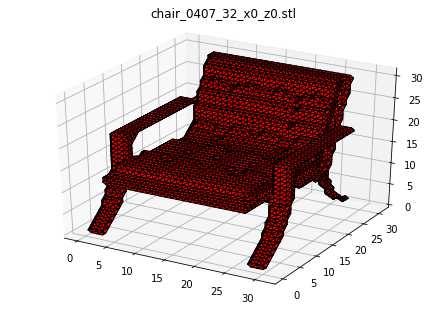

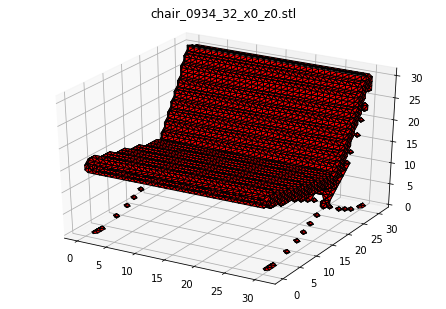

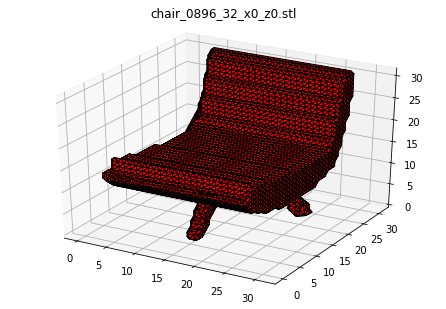

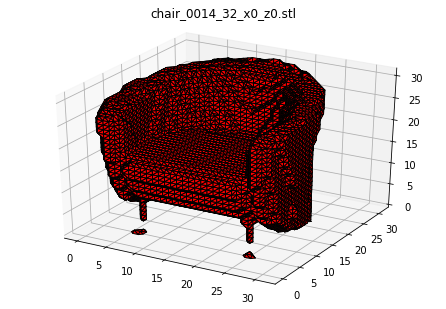

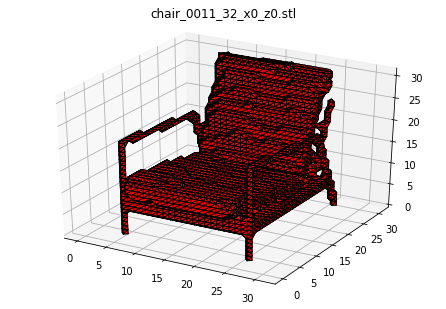

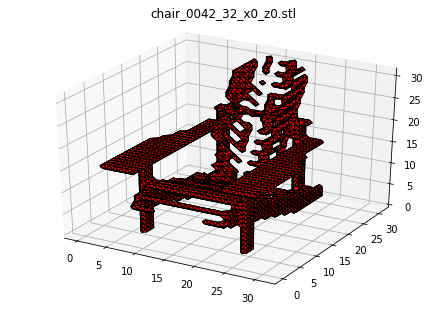

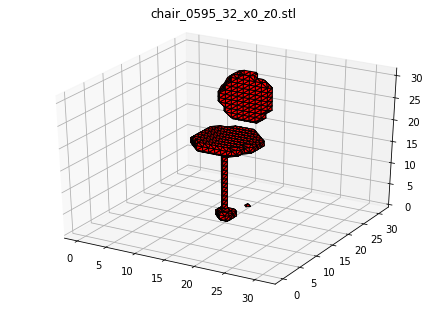

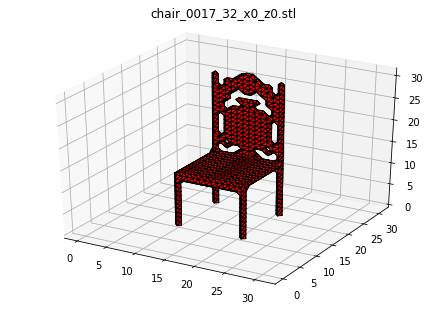

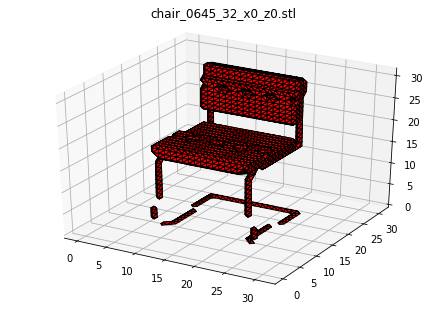

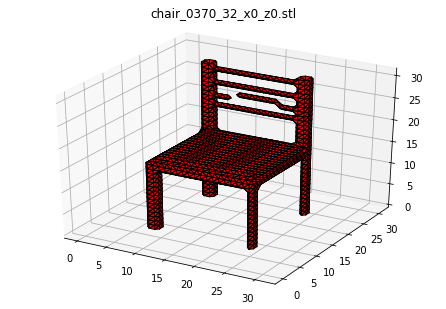

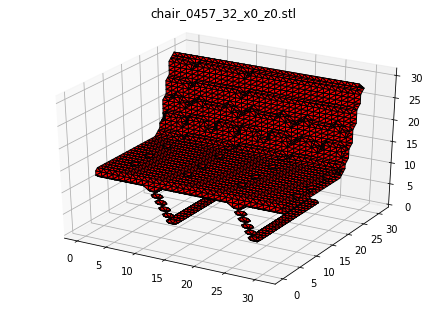

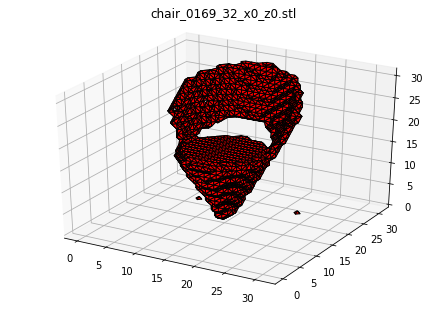

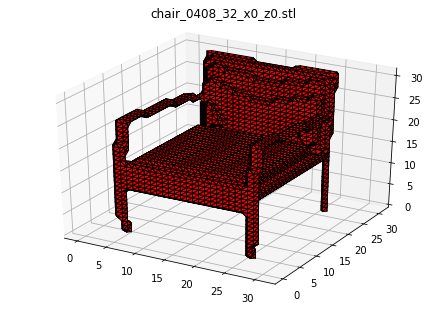

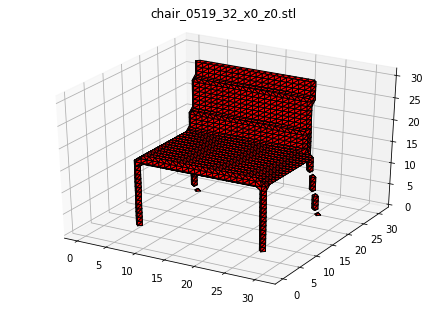

In [196]:
interesting_objects_by_category('chair')